<a href="https://colab.research.google.com/github/Ali-Bhatti/myRepos/blob/master/LeNet_FYP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounting  Google Drive

In [124]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [125]:
import numpy as np
from matplotlib import pyplot as plt
import h5py
import cv2
#from PIL import Image

In [126]:
Xtrain = np.ndarray(shape = (1864,32,32)) #1564 + 500 + 1000
Ytrain = np.zeros(1864)

Xval = np.ndarray(shape = (500,32,32)) #1564 + 500 + 1000
Yval = np.zeros(500)

Xtest = np.ndarray(shape = (1200,32,32)) #1564 + 500 + 1000
Ytest = np.zeros(1200)

train_count = 0
test_count= 0
val_count = 0

In [ ]:
i = 1
while i <3065: 
    if test_count < 500:
        if i < 767:
          path = '/content/drive/MyDrive/TUMOR DATASET/tumor1.zip (Unzipped Files)/'
        elif i < 1533:
          path = '/content/drive/MyDrive/TUMOR DATASET/tumor3.zip (Unzipped Files)/'
        elif i < 2299:
          path = '/content/drive/MyDrive/TUMOR DATASET/tumor2.zip (Unzipped Files)/'
        else:
          path = '/content/drive/MyDrive/TUMOR DATASET/tumor4.zip (Unzipped Files)/'

        f = h5py.File(path+str(i)+'.mat','r')
        gr = f.get('cjdata')
        im = np.array(gr.get('image'))
        norm_image = cv2.normalize(im, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F) #for normalizing the images of dataset
        norm_image = cv2.resize(norm_image, (32,32), interpolation = cv2.INTER_AREA)

        XVal[test_count] = np.array(norm_image)
        YVal[test_count] = gr.get('label')[()]
        test_count +=1
        i+=1  
    if train_count < 1864:
        if i < 767:
          path = '/content/drive/MyDrive/TUMOR DATASET/tumor1.zip (Unzipped Files)/'
        elif i < 1533:
          path = '/content/drive/MyDrive/TUMOR DATASET/tumor3.zip (Unzipped Files)/'
        elif i < 2299:
          path = '/content/drive/MyDrive/TUMOR DATASET/tumor2.zip (Unzipped Files)/'
        else:
          path = '/content/drive/MyDrive/TUMOR DATASET/tumor4.zip (Unzipped Files)/'

        f = h5py.File(path+str(i)+'.mat','r')
        gr = f.get('cjdata')
        im = np.array(gr.get('image'))
        norm_image = cv2.normalize(im, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F) #for normalizing the images of dataset
        norm_image = cv2.resize(norm_image, (32,32), interpolation = cv2.INTER_AREA)
        Xtrain[train_count] = np.array(norm_image)
        Ytrain[train_count] = gr.get('label')[()]
        train_count +=1
        i+=1

    if test_count < 1200:
        if i < 767:
          path = '/content/drive/MyDrive/TUMOR DATASET/tumor1.zip (Unzipped Files)/'
        elif i < 1533:
          path = '/content/drive/MyDrive/TUMOR DATASET/tumor3.zip (Unzipped Files)/'
        elif i < 2299:
          path = '/content/drive/MyDrive/TUMOR DATASET/tumor2.zip (Unzipped Files)/'
        else:
          path = '/content/drive/MyDrive/TUMOR DATASET/tumor4.zip (Unzipped Files)/'

        f = h5py.File(path+str(i)+'.mat','r')
        gr = f.get('cjdata')
        im = np.array(gr.get('image'))
        norm_image = cv2.normalize(im, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F) #for normalizing the images of dataset
        norm_image = cv2.resize(norm_image, (32,32), interpolation = cv2.INTER_AREA)

        Xtest[test_count] = np.array(norm_image)
        Ytest[test_count] = gr.get('label')[()]
        test_count +=1
        i+=1
   
    print(i)

#    print(np.max(norm_image))
#    plt.imshow(norm_image, cmap="gray") 
#  plt.show()
#    print((gr.get('label')[()])) #cjdata.label: 1 for meningioma, 2 for glioma, 3 for pituitary tumor

In [128]:
#a,b,c = 0,0,0
#for i in range(0,500):
#  if Yval[i] == 1:
#    a+=1
#  elif Yval[i] == 2:
#    b+=1
#  elif Yval[i] == 3:
#    c+=1
#print(a,b,c)

In [129]:
a,b,c = 0,0,0
for i in range(0,1864):
  if Ytrain[i] == 1:
    a+=1
  elif Ytrain[i] == 2:
    b+=1
  elif Ytrain[i] == 3:
    c+=1
print(a,b,c)

355 1044 465


In [130]:
a,b,c = 0,0,0
for i in range(0,1200):
  if Ytest[i] == 1:
    a+=1
  elif Ytest[i] == 2:
    b+=1
  elif Ytest[i] == 3:
    c+=1
print(a,b,c)

353 382 465


Reshaping data

In [131]:
Xtrain = Xtrain.reshape(Xtrain.shape[0],32,32,1)
#Xval = Xval.reshape(Xval.shape[0],32,32,1)
Xtest = Xtest.reshape(Xtest.shape[0],32,32,1)

Ytrain = Ytrain-1
#Yval = Yval - 1
Ytest = Ytest - 1

print(Ytrain.shape)
print(Ytrain)

(1864,)
[0. 0. 0. ... 1. 0. 0.]


Importing Tensorflow

In [132]:
import tensorflow as tf

In [133]:

# build a sequential model


cnnmodel = tf.keras.Sequential([
      tf.keras.layers.Conv2D(6,(5,5),input_shape=(32,32,1),strides=(1,1),activation='tanh', padding="same"),
      tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),

      tf.keras.layers.Conv2D(16,(5,5),strides=(1,1),activation='tanh', padding='valid'),
      tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),

      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(120, activation='tanh'),
      tf.keras.layers.Dense(84, activation='tanh'),
      tf.keras.layers.Dense(3, activation='softmax')

])

In [137]:
#0 for meningioma, 1 for glioma, 2 for pituitary tumor
cn = ['meningioma','glioma', 'pituitary']
cnnmodel.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 32, 32, 6)         156       
_________________________________________________________________
average_pooling2d_22 (Averag (None, 16, 16, 6)         0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 12, 12, 16)        2416      
_________________________________________________________________
average_pooling2d_23 (Averag (None, 6, 6, 16)          0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 576)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 120)               69240     
_________________________________________________________________
dense_34 (Dense)             (None, 84)               

In [138]:
# to shuffle the data
from sklearn.utils import shuffle
Xtrain, Ytrain = shuffle(Xtrain, Ytrain)

In [139]:
# log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
# # Specify the callback object
# tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [140]:
print(Ytrain)

[1. 0. 0. ... 1. 1. 1.]


In [168]:
# compile model
cnnmodel.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
# fit on data for 30 epochs
history = cnnmodel.fit(Xtrain, tf.keras.utils.to_categorical(Ytrain),epochs=30, validation_split=0.33, batch_size=10)

Epoch 1/30
125/125 [==============================] - 1s 5ms/step - loss: 0.0158 - accuracy: 0.9960 - val_loss: 0.6562 - val_accuracy: 0.8701
Epoch 2/30
125/125 [==============================] - 1s 5ms/step - loss: 0.0113 - accuracy: 0.9979 - val_loss: 0.6418 - val_accuracy: 0.8718
Epoch 3/30
125/125 [==============================] - 1s 4ms/step - loss: 0.0131 - accuracy: 0.9973 - val_loss: 0.7036 - val_accuracy: 0.8377
Epoch 4/30
125/125 [==============================] - 1s 5ms/step - loss: 0.0275 - accuracy: 0.9924 - val_loss: 0.6996 - val_accuracy: 0.8523
Epoch 5/30
125/125 [==============================] - 1s 4ms/step - loss: 0.0517 - accuracy: 0.9816 - val_loss: 0.7388 - val_accuracy: 0.8523
Epoch 6/30
125/125 [==============================] - 1s 4ms/step - loss: 0.0222 - accuracy: 0.9936 - val_loss: 0.7182 - val_accuracy: 0.8555
Epoch 7/30
125/125 [==============================] - 1s 4ms/step - loss: 0.0236 - accuracy: 0.9878 - val_loss: 0.6954 - val_accuracy: 0.8604
Epoch 

In [169]:
tf.keras.utils.to_categorical(Ytrain).shape

(1864, 3)

In [170]:
np.unique(Ytrain)

array([0., 1., 2.])

In [171]:
y_pred = cnnmodel.predict(Xtest)

In [172]:

prediction = tf.math.argmax(y_pred, axis=1)
equality = tf.math.equal(prediction, Ytest)
accuracy = tf.math.reduce_mean(tf.cast(equality, tf.float32))

In [173]:
print(accuracy)

tf.Tensor(0.895, shape=(), dtype=float32)


In [174]:
cn[np.argmax(y_pred[140])]

'meningioma'

In [175]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


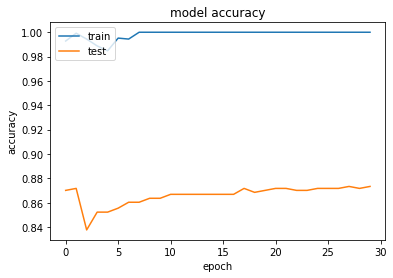

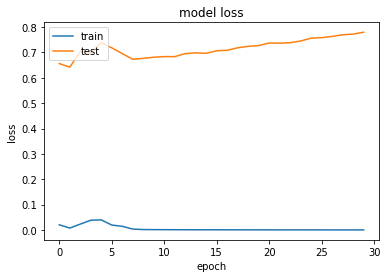

In [176]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [150]:
# retrieve weights from the second hidden layer
# filters = cnnmodel.layers[0].get_config()
# print(filters)
# for i in range(3):
#   b = cnnmodel.layers[i].count_params()
#   print(b)


In [151]:
# layer_names = [layer.name for layer in cnnmodel.layers]
# layer_names

# layer_outputs = [layer.output for layer in cnnmodel.layers]
# layer_outputs

In [152]:

# model = tf.keras.models.Model(inputs=cnnmodel.inputs, outputs=cnnmodel.layers[1].output)
# model.summary()

In [153]:
# img = np.expand_dims(Xtest[40], axis=0)
# #Xtest[40].shape
# feature_maps = model.predict(img)

In [154]:
# plot all 64 maps in an 8x8 squares
# square = 8
# ix = 1
# for _ in range(square):
# 	for _ in range(4):
# 		# specify subplot and turn of axis
# 		ax = plt.subplot(square, square, ix)
# 		ax.set_xticks([])
# 		ax.set_yticks([])
# 		# plot filter channel in grayscale
# 		plt.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
# 		ix += 1
# # show the figure
# plt.show()

In [155]:
for layer in cnnmodel.layers:
    if 'conv' in layer.name:
      print(layer.name)

conv2d_22
conv2d_23


In [156]:
def displayfmaps(imagex):
  img = np.expand_dims(imagex, axis=0)
  for xlayer in cnnmodel.layers:
    if 'conv' not in xlayer.name:
      continue
    model = tf.keras.models.Model(inputs=cnnmodel.inputs, outputs=xlayer.output)
    feature_maps = model.predict(img)
    square = 8
    ix = 1
    for _ in range(square):
      for _ in range(4):
        if(feature_maps[:,:,:].shape > (100,)):
          ix +=50
      # specify subplot and turn of axis
        ax = plt.subplot(square, 10, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
        ix += 1
  # show the figure
    plt.show()

In [157]:
#displaying Features (Function Call)
#displayfmaps(Xtest[150])